<div style="background-color: #eee3d3">
<h1> 3-transformation_scaling_normalisation.ipynb </h1>
</div>

# Transformation, scaling and normalization

---

### The purpose of this notebook is to use different methods to transform/scale/normalise the data in our peak table :

- Transformation methods : apply the same mathematical transformation to all values in the peak table

- Metabolite-based Scaling Methods : scale the features to make them fit a normal distribution, which is often required for further downstream analysis : statistical tests, machine learning algorithms ...

- Sample-based Normalisation Methods : normalise the samples so they can be comparable, e.g. normalise them to have a unit form, which is required for some machine learning algorithm based on distance assumption (SVD, KNN, ...)

---

The notebook has been initially run with the peak table imputed with the KNN imputation method but not sure this is the best method ! Who knows ? :)

You can test this notebook with peak tables imputed with different methods to compare the results.

_Idea (__bonus__) : create a notebook which, on a given peak table, automatically applies all the possible combinaisons of missing value imputation + transformation (or not) + scaling (or not) + normalisation (or not), and then assess automatically assess which combinaison(s) is(are) the best. (This will create many peak tables and could be computationally heavy)_

---

## Import modules

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import math
import numpy as np
import os
import sys

sys.path.append('/'.join(os.getcwd().split('/')[:-1]) + '/bin/')


In [5]:
import normalisation_scaling_functions as nsf

## Import data

We import the peak table we inputed with the KNN method in the previous notebook

In [6]:
path_X_imputed = '/'.join(os.getcwd().split('/')[:-1]) + '/data/peakTable/imputed_peak_tables/'

In [7]:
# Complete the following path with the chosen imputed peak table
X_imp = pd.read_csv(path_X_imputed+"X_KNN_samples.csv", sep=',', decimal='.', na_values='NA')
X_imp

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,19.761786,14.635833,22.185582,16.414744,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,19.735279,15.193396,20.831414,15.052533,12.519222,15.145423,14.034654,17.953780,11.971249,15.907714,...,13.020365,12.928643,13.697314,12.927804,12.604052,12.102163,13.568853,12.208084,12.609957,13.452546
2,19.116076,15.446714,22.152604,16.410827,12.383736,14.628890,15.316772,17.404715,12.786407,15.947176,...,12.411317,12.379802,13.136575,13.330175,12.226220,11.877304,14.215988,12.185576,12.955618,13.778398
3,19.376875,15.460525,22.169389,16.403964,12.720767,15.937169,15.967749,15.836957,12.278686,16.371211,...,12.674914,12.621035,13.086805,13.304171,12.298832,11.605353,14.284148,12.319119,13.058285,13.812829
4,19.555938,14.515536,22.150249,16.372219,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,...,12.731422,12.521877,12.617334,13.306722,12.349830,11.926237,14.192775,12.356960,13.006556,13.841201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19.664978,14.447858,20.808503,15.027154,12.648327,14.806952,14.244917,17.126579,12.080710,15.388376,...,12.349299,11.505004,13.189121,12.175600,12.198922,12.102162,12.363040,12.402860,12.032016,12.050912
182,19.301954,14.839941,21.085175,15.321075,12.510670,14.488147,15.163197,16.816591,12.452644,16.474456,...,12.909283,12.642143,12.742126,12.109005,12.708850,12.462751,12.175110,12.635066,12.001124,12.203054
183,19.170626,14.291711,21.381912,15.197205,12.499558,14.434959,14.520558,16.315887,12.808417,15.613263,...,12.846355,13.243400,13.031584,12.165298,12.199647,12.082515,12.251595,12.258149,12.029196,12.277214
184,18.869505,14.440576,20.961485,14.829978,12.312338,14.114074,13.776358,16.110117,12.667428,16.021372,...,12.477753,11.789382,13.237739,12.389888,11.628154,12.077076,12.450109,12.383578,12.102824,12.050912


In [8]:
nsf.print_stats(X_imp)

----------X.min().mean()----------
 13.319122228357132 

----------X.max().mean()----------
 16.652160409361407 

----------X.mean().mean()---------
 14.914078533165021 

----------X.std().mean()----------
 0.5933310233465334 



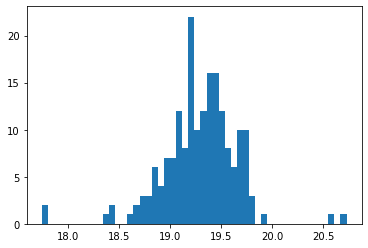

In [9]:
n, bins, patches=plt.hist(X_imp["variable_3"],bins=50)

In [10]:
X_imp.iloc[0,]

variable_3       19.761786
variable_5       14.635833
variable_6       22.185582
variable_7       16.414744
variable_8       12.615143
                   ...    
variable_2365    12.114328
variable_2368    14.269258
variable_2370    12.355017
variable_2375    13.114289
variable_2379    13.882526
Name: 0, Length: 557, dtype: float64

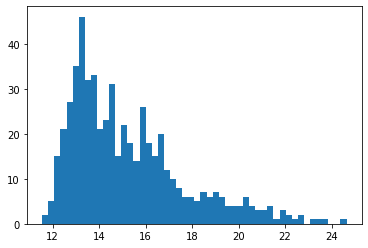

In [11]:
n, bins, patches=plt.hist(X_imp.iloc[0,],bins=50)

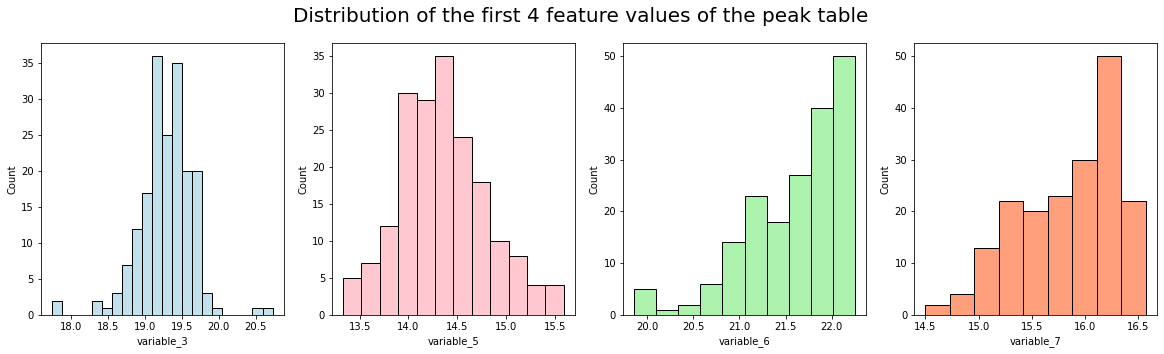

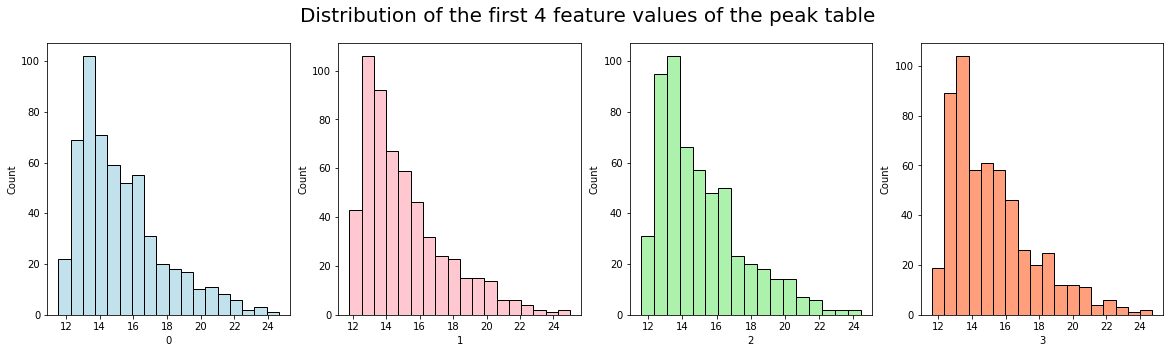

In [12]:
nsf.plot_first_distributions_metabolites(X_imp)
nsf.plot_first_distributions_samples(X_imp)

We can see that the values can be in a different range according to the feature. For further analysis, it would be better to apply a few transformation on our peak table :
- a normalisation (for example a StandardScaler) on each feature to have a mean value of 0 et a std of 1
- a scaling (for example with Normalizer) on each samples to have a vector norm equal to 1

This will allow to compare with an equal weight all to features and all the samples.

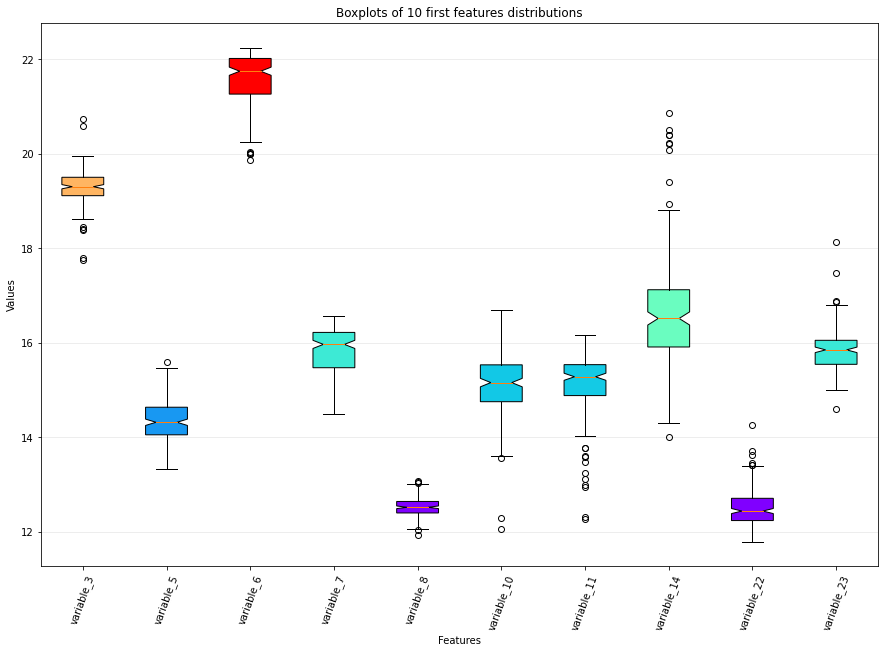

In [13]:
nsf.boxplot_first_distributions_metabolites(X_imp)

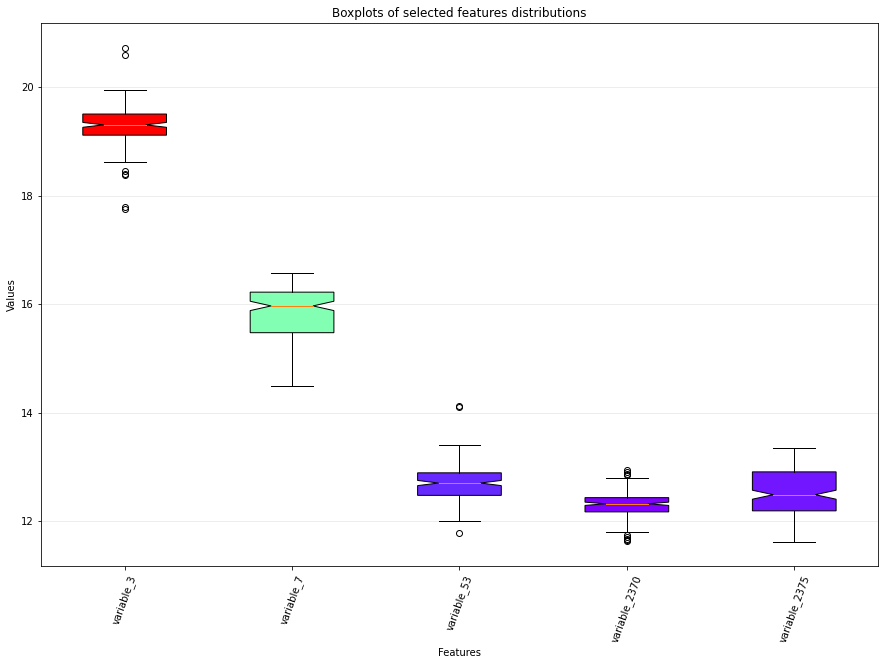

In [14]:
nsf.boxplot_first_distributions_metabolites(X_imp, list_features=['variable_3', 'variable_7', 'variable_53', 'variable_2370', 'variable_2375'])

# Transformation methods

Inspired by [this link](https://www.statology.org/transform-data-in-python/), we can transform our data to make it more normally distributed, with one of these three methods, for each column y :
- __loge__ : Log Transformation (base-e log i.e. natural log) : $log_e(y)$
- __log2__ : Log Transformation (base-2 log) : $log_{2}(y)$
- __log10__ : Log Transformation (base-10 log) : $log_{10}(y)$
- __sqrt__ : Square Root Transformation : $\sqrt y$
- __cbrt__ : Cube Root Transformation : $^3\sqrt y$


## Based-e log

In [ ]:
nsf.normPeakTable(X_imp, 'loge', based='metabolite')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_imp, nsf.normPeakTable(X_imp, 'loge', based='metabolite'), n=6,title="")

In [ ]:
list_features

In [ ]:
list_features = ['variable_3', 'variable_7', 'variable_53', 'variable_2370', 'variable_2375']
nsf.boxplot_first_distributions_metabolites_before_after(X_imp, nsf.normPeakTable(X_imp, 'loge', based=''), list_features=list_features)

## Based-2 log

In [ ]:
nsf.normPeakTable(X_imp, 'log2', based='metabolite')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_imp, nsf.normPeakTable(X_imp, 'log2', based='samples'))

## Based-10 log

In [ ]:
nsf.normPeakTable(X_imp, 'log10', based='metabolite')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_imp, nsf.normPeakTable(X_imp, 'log10', based='metabolite'))

## Square root

In [ ]:
X_KNN=X_imp

In [ ]:
nsf.normPeakTable(X_KNN, 'sqrt', based='metabolite')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'sqrt', based='metabolite'))

## Cubic root

In [ ]:
nsf.normPeakTable(X_KNN, 'cbrt', based='metabolite')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'cbrt', based='metabolite'))

# Metabolite-based Scaling Methods

At this point, we want to normalise our peak table based on metabolite values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Range scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Min-max scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Maximum absolute scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Level scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Robust scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Autoscaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Pareto scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Vast scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
</table>

## Range scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

In [ ]:
nsf.normPeakTable(X_KNN, 'range_scaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'range_scaling', based='metabolite'))

## Mini-max scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

_Use <code>MinMaxScaler()</code> function from <code>scikitlearn</code> package_

In [ ]:
nsf.normPeakTable(X_KNN, 'minmax_scaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'minmax_scaling', based='metabolite'))

## Maximum absolute scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
\end{eqnarray}

In [ ]:
nsf.normPeakTable(X_KNN, 'max_abs_scaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'max_abs_scaling', based='metabolite'))

## Level scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
\end{eqnarray}

In [ ]:
nsf.normPeakTable(X_KNN, 'level_scaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'level_scaling', based='metabolite'))

## Robust scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
\end{eqnarray}

_Use <code>RobustScaler()</code> function from <code>scikitlearn</code> package_

In [ ]:
nsf.normPeakTable(X_KNN, 'robust_scaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'robust_scaling', based='metabolite'))

## Autoscaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
\end{eqnarray}

_Use <code>StandardScaler()</code> function from <code>scikitlearn</code> package_

In [ ]:
nsf.normPeakTable(X_KNN, 'autoscaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'autoscaling', based='metabolite'))

## Pareto scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'pareto_scaling', based='metabolites')

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'pareto_scaling', based='metabolite'))

## Vast scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'vast_scaling', based='metabolites')

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'vast_scaling', based='metabolite'))

# Sample-based Normalisation Methods

At this point, we want to normalise our peak table based on sample values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Mean normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - \bar{x}_i
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Median normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L1 normalisation</td>
    <td>
        \begin{eqnarray}
             \sum_{i=1}^p x_{ni} = 1
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L2 normalisation</td>
    <td>
        \begin{eqnarray}
            \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
        \end{eqnarray}
    </td>
  </tr>
</table>

## Mean normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - \bar{x}_i
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'mean_normalisation', based='samples')

In [ ]:
normPeakTable(X_KNN, 'mean_normalisation', based='samples').mean(axis=1).round()

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'mean_normalisation', based='samples'))

## Median normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
\end{eqnarray}

In [ ]:
nsf.normPeakTable(X_KNN, 'median_normalisation', based='samples')

In [ ]:
nsf.normPeakTable(X_KNN, 'median_normalisation', based='samples').median(axis=1)

In [ ]:
row_medians = np.median(X_KNN, axis=1)
row_medians = np.array(row_medians).reshape((row_medians.shape[0], 1))
print('Median :\n', (X_KNN - row_medians).median(axis=1), '\n')
print('Mean :\n', (X_KNN - row_medians).mean(axis=1), '\n')

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'median_normalisation', based='samples'))

## L1 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
     \sum_{i=1}^p x_{ni} = 1
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'l1_normalisation', based='samples')

In [ ]:
normPeakTable(X_KNN, 'l1_normalisation', based='samples').sum(axis=1)

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'l1_normalisation', based='samples'))

## L2 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
    \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'l2_normalisation', based='samples')

In [ ]:
np.sqrt((normPeakTable(X_KNN, 'l2_normalisation', based='samples') * normPeakTable(X_KNN, 'l2_normalisation', based='samples')).sum(axis=1))

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'l2_normalisation', based='samples'))

### EXERCISE : comment the different treatements

#### Based on your criteria, which method(s) should be used on these data ?

#### What are the common transformation/scaling/normalisation methods used in metabolomics (on LC-MS data in particular) ? Does it correspond to the "best" method(s) you found here ?

Depanding on the methods use to analyse our data different normalisation methods could be needed


https://www.scirp.org/pdf/ABB_2018081015055107.pdf

### libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import math
import numpy as np
import os
import sys

In [16]:
sys.path.append('/'.join(os.getcwd().split('/')[:-1]) + '/bin/')
import normalisation_scaling_functions as nsf

### Import data

In [17]:
path_X_imputed = '/'.join(os.getcwd().split('/')[:-1]) + '/data/peakTable/imputed_peak_tables/'
X_imp = pd.read_csv(path_X_imputed+"X_KNN_samples.csv", sep=',', decimal='.', na_values='NA')

### Export folder

In [18]:
path_X_scaling = '/'.join(os.getcwd().split('/')[:-1]) + '/data/peakTable/scaled_peak_tables/'

### Methods used

In [37]:
methods=["l1_normalisation",
         "l2_normalisation",
         "median_normalisation",
         "vast_scaling",
         "pareto_scaling",
         "autoscaling",
         "robust_scaling",
         "level_scaling",
         "max_abs_scaling",
         "minmax_scaling",
         "range_scaling",
         "cbrt",
         "sqrt",
         "log10",
         "log2",
         "loge"]

imputation_methods=["X_mean",
                    "X_median",
                    "X_const_1",
                    "X_python_MICE_ExtraTreesRegressor",
                    "X_min_f",
                    "subset_multival_MICE_KNeighborsRegressor",
                    "X_KNN_features",
                    "X_python_MICE_KNeighborsRegressor",
                    "subset_multival_MICE_BayesianRidge",
                    "subset_multival_MICE_ExtraTreesRegressor",
                    "X_python_MICE_DecisionTreeRegressor",
                    "X_most",
                    "X_python_MICE_BayesianRidge",
                    "X_KNN_samples",
                    "X_half_min_f",
                    "subset_multival_MICE_DecisionTreeRegressor",
                    "X_const_0"]

### Transform plot and save all methods

begin l1_normalisation-----------------------------------------------------------


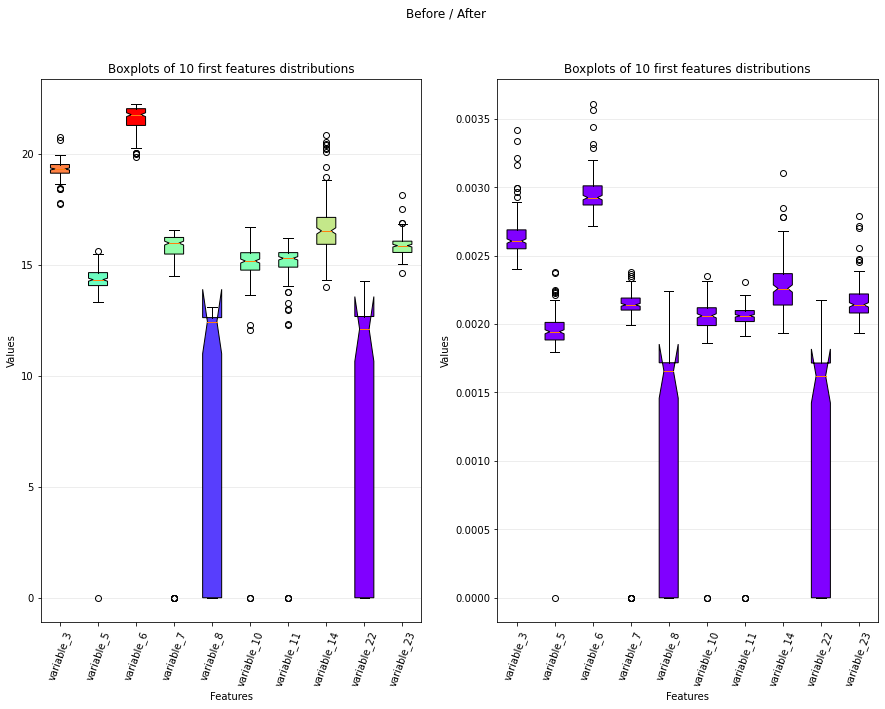

end l1_normalisation--------------------------------------------------------------
begin l2_normalisation-----------------------------------------------------------


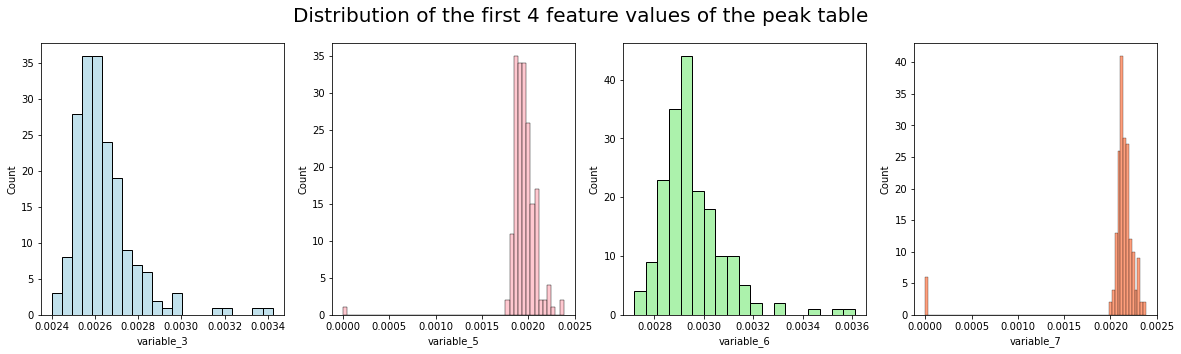

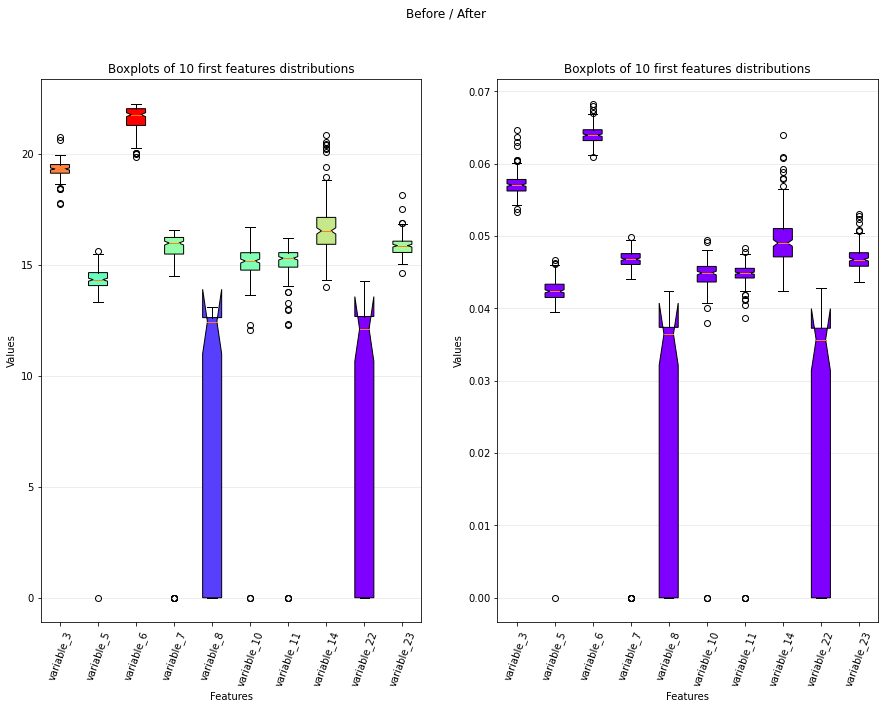

end l2_normalisation--------------------------------------------------------------
begin median_normalisation-----------------------------------------------------------


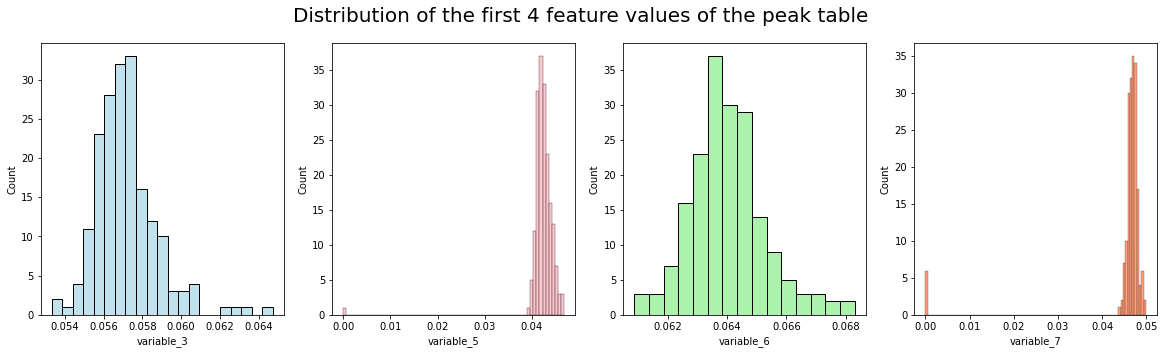

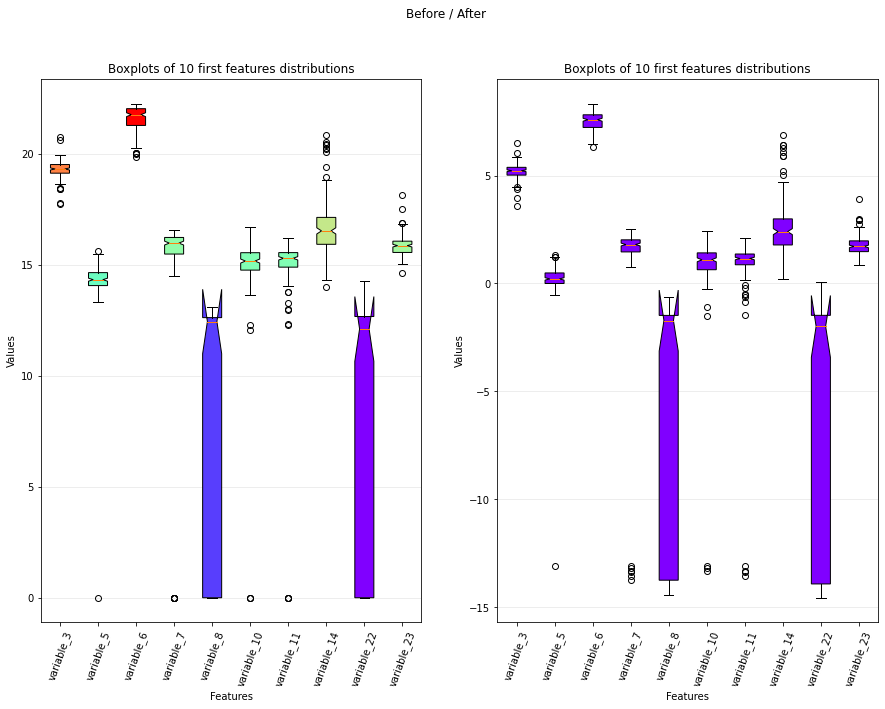

end median_normalisation--------------------------------------------------------------
begin loge-----------------------------------------------------------


/home/thomas/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


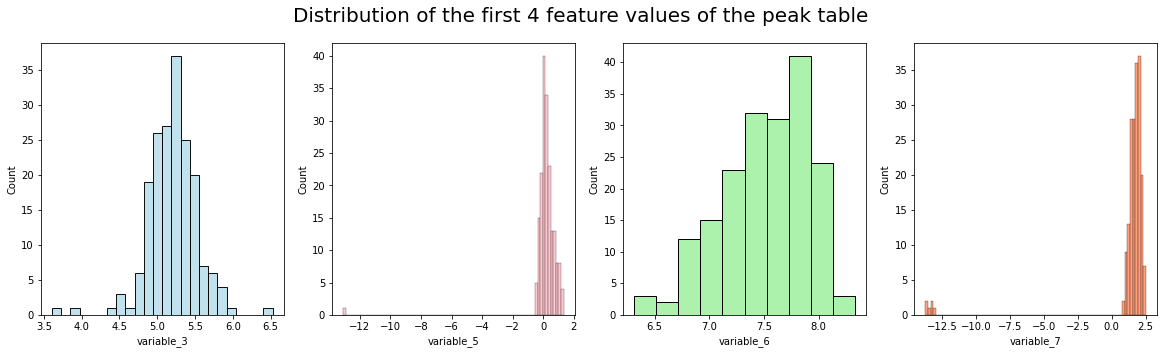

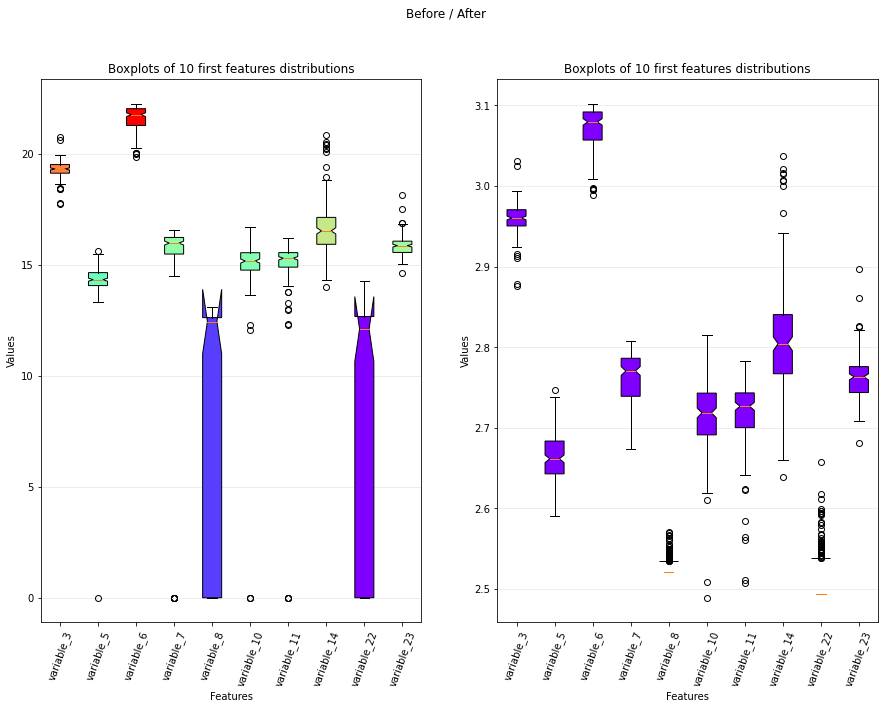

end loge--------------------------------------------------------------


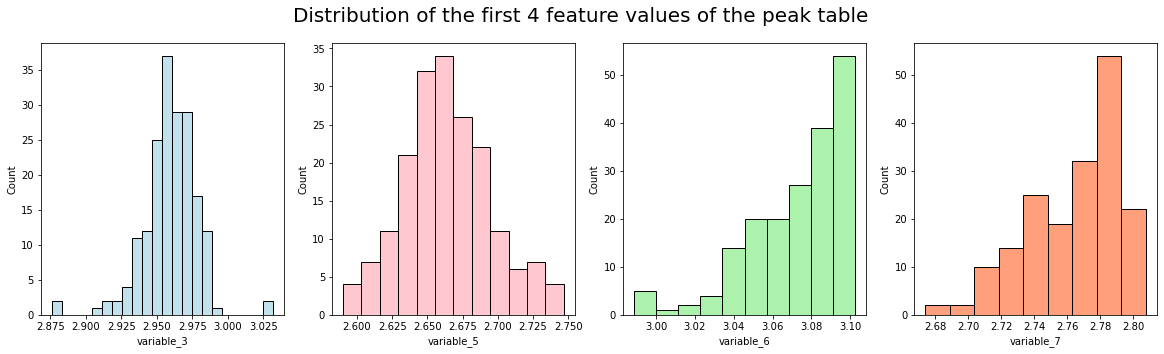

In [23]:
for method in methods:
    print("begin "+method+"-----------------------------------------------------------")
    data_to_save=nsf.normPeakTable(X_imp, method, based='samples')
    data_to_save.to_csv(path_X_scaling+method+".csv")
    nsf.boxplot_first_distributions_metabolites_before_after(X_imp, data_to_save)
    nsf.plot_first_distributions_metabolites(data_to_save)
    #nsf.plot_first_distributions_samples(data_to_save)
    print("end "+method+"--------------------------------------------------------------")

    #np.sqrt((normPeakTable(X_KNN, 'l2_normalisation', based='samples') * normPeakTable(X_KNN, 'l2_normalisation', based='samples')).sum(axis=1))
#normPeakTable(X_KNN, 'l2_normalisation', based='samples')

In [34]:
method="l1_normalisation"
imputation="X_KNN_samples"
print(method)
X_imp = pd.read_csv(path_X_imputed+imputation+".csv", sep=',', decimal='.', na_values='NA')
data_to_save=nsf.normPeakTable(X_imp, method, based='samples')
data_to_save.to_csv(path_X_scaling+method+"_"+imputation+"test.csv")

#data_to_save

l1_normalisation


In [38]:
for imputation in imputation_methods :
    X_imp = pd.read_csv(path_X_imputed+imputation+".csv", sep=',', decimal='.', na_values='NA')
    for method in methods:
        print(X_imp)
        print(method)
        #print("begin "+method+"-----------------------------------------------------------")
        data_to_save=nsf.normPeakTable(X_imp, method, based='samples')
        data_to_save.to_csv(path_X_scaling+method+"_"+imputation+".csv")
        #nsf.boxplot_first_distributions_metabolites_before_after(X_imp, data_to_save)
        #nsf.plot_first_distributions_metabolites(data_to_save)
        #nsf.plot_first_distributions_samples(data_to_save)
        print("saved : " +method+"_"+imputation+".csv")


     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.520547    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.520547    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.358631   20.005032   15.873984   12.414258    15.138143   

     variable_11  variable_14  variable

saved : median_normalisation_X_mean.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.520547    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.520547    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.358631   20.005032   15.873984   12.414258    15.138143   


saved : autoscaling_X_mean.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.520547    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.520547    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.358631   20.005032   15.873984   12.414258    15.138143   

     var

saved : max_abs_scaling_X_mean.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.520547    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.520547    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.358631   20.005032   15.873984   12.414258    15.138143   

    

saved : cbrt_X_mean.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.520547    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.520547    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.358631   20.005032   15.873984   12.414258    15.138143   

     variable_1

saved : log2_X_mean.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.520547    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.520547    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.358631   20.005032   15.873984   12.414258    15.138143   

     variable_1

saved : l2_normalisation_X_median.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.521564    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.521564    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.325310   20.005032   15.994947   12.414258    15.159946   

 

saved : pareto_scaling_X_median.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.521564    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.521564    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.325310   20.005032   15.994947   12.414258    15.159946   

   

saved : level_scaling_X_median.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.521564    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.521564    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.325310   20.005032   15.994947   12.414258    15.159946   

    

saved : range_scaling_X_median.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.521564    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.521564    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.325310   20.005032   15.994947   12.414258    15.159946   

    

saved : log10_X_median.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.521564    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.521564    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.325310   20.005032   15.994947   12.414258    15.159946   

     variabl

saved : l1_normalisation_X_const_1.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    1.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    1.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    1.000000   20.005032    1.000000   12.414258     1.000000   



saved : vast_scaling_X_const_1.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    1.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    1.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    1.000000   20.005032    1.000000   12.414258     1.000000   

    

saved : robust_scaling_X_const_1.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    1.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    1.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    1.000000   20.005032    1.000000   12.414258     1.000000   

  

saved : minmax_scaling_X_const_1.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    1.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    1.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    1.000000   20.005032    1.000000   12.414258     1.000000   

  

saved : sqrt_X_const_1.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    1.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    1.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    1.000000   20.005032    1.000000   12.414258     1.000000   

     variabl

saved : loge_X_const_1.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.443818    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.453086    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.681039   20.005032   14.642579   12.414258    12.566592   

     variabl

saved : median_normalisation_X_python_MICE_ExtraTreesRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.443818    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.453086    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.681039   20.005032   14.642579  

saved : autoscaling_X_python_MICE_ExtraTreesRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.443818    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.453086    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.681039   20.005032   14.642579   12.41425

saved : max_abs_scaling_X_python_MICE_ExtraTreesRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.443818    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.453086    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.681039   20.005032   14.642579   12.4

saved : cbrt_X_python_MICE_ExtraTreesRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.443818    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.453086    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.681039   20.005032   14.642579   12.414258    12

saved : log2_X_python_MICE_ExtraTreesRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.443818    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.453086    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.681039   20.005032   14.642579   12.414258    12

saved : l2_normalisation_X_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   11.938442    15.145423   
2     19.116076   15.446714   22.152604   16.410827   11.938442    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.331213   20.005032   14.498838   12.414258    12.051625   

  

saved : pareto_scaling_X_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   11.938442    15.145423   
2     19.116076   15.446714   22.152604   16.410827   11.938442    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.331213   20.005032   14.498838   12.414258    12.051625   

    

saved : level_scaling_X_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   11.938442    15.145423   
2     19.116076   15.446714   22.152604   16.410827   11.938442    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.331213   20.005032   14.498838   12.414258    12.051625   

     

saved : range_scaling_X_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   11.938442    15.145423   
2     19.116076   15.446714   22.152604   16.410827   11.938442    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.331213   20.005032   14.498838   12.414258    12.051625   

     

saved : log10_X_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   11.938442    15.145423   
2     19.116076   15.446714   22.152604   16.410827   11.938442    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.331213   20.005032   14.498838   12.414258    12.051625   

     variable

saved : l2_normalisation_subset_multival_MICE_KNeighborsRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.952541    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.673728    14.629414   
2     19.338536   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.562894   22.150249    16.610171    16.171763    14.716093   
..          ...         ...          ...          ...          ...   
181   19.664978   21.318044    16.844705    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.552496    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    16.146900    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.27

saved : autoscaling_subset_multival_MICE_KNeighborsRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.952541    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.673728    14.629414   
2     19.338536   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.562894   22.150249    16.610171    16.171763    14.716093   
..          ...         ...          ...          ...          ...   
181   19.664978   21.318044    16.844705    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.552496    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    16.146900    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.279597 

saved : minmax_scaling_subset_multival_MICE_KNeighborsRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.952541    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.673728    14.629414   
2     19.338536   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.562894   22.150249    16.610171    16.171763    14.716093   
..          ...         ...          ...          ...          ...   
181   19.664978   21.318044    16.844705    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.552496    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    16.146900    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.2795

saved : log10_subset_multival_MICE_KNeighborsRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.952541    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.673728    14.629414   
2     19.338536   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.562894   22.150249    16.610171    16.171763    14.716093   
..          ...         ...          ...          ...          ...   
181   19.664978   21.318044    16.844705    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.552496    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    16.146900    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.279597    15.

saved : l1_normalisation_X_KNN_features.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.537659    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.440713    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.949071   20.005032   15.670752   12.414258    14.013187

saved : vast_scaling_X_KNN_features.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.537659    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.440713    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.949071   20.005032   15.670752   12.414258    14.013187   


saved : robust_scaling_X_KNN_features.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.537659    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.440713    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.949071   20.005032   15.670752   12.414258    14.013187  

saved : minmax_scaling_X_KNN_features.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.537659    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.440713    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.949071   20.005032   15.670752   12.414258    14.013187  

saved : sqrt_X_KNN_features.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.537659    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.440713    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.949071   20.005032   15.670752   12.414258    14.013187   

     va

saved : loge_X_KNN_features.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.391614    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.475976    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.986335   20.005032   15.027509   12.414258    13.952816   

     va

saved : median_normalisation_X_python_MICE_KNeighborsRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.391614    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.475976    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.986335   20.005032   15.027509  

saved : autoscaling_X_python_MICE_KNeighborsRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.391614    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.475976    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.986335   20.005032   15.027509   12.41425

saved : max_abs_scaling_X_python_MICE_KNeighborsRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.391614    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.475976    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.986335   20.005032   15.027509   12.4

saved : cbrt_X_python_MICE_KNeighborsRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.391614    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.475976    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.986335   20.005032   15.027509   12.414258    13

saved : log2_X_python_MICE_KNeighborsRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.391614    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.475976    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.986335   20.005032   15.027509   12.414258    13

saved : median_normalisation_subset_multival_MICE_BayesianRidge.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   22.184809    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.887107    14.717492   
2     19.430488   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.734034   22.150249    16.610171    16.171763    14.642725   
..          ...         ...          ...          ...          ...   
181   19.664978   21.118601    17.409057    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.945223    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    16.007674    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.4687

saved : robust_scaling_subset_multival_MICE_BayesianRidge.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   22.184809    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.887107    14.717492   
2     19.430488   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.734034   22.150249    16.610171    16.171763    14.642725   
..          ...         ...          ...          ...          ...   
181   19.664978   21.118601    17.409057    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.945223    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    16.007674    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.468756    

saved : range_scaling_subset_multival_MICE_BayesianRidge.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   22.184809    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.887107    14.717492   
2     19.430488   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.734034   22.150249    16.610171    16.171763    14.642725   
..          ...         ...          ...          ...          ...   
181   19.664978   21.118601    17.409057    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.945223    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    16.007674    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.468756    1

saved : log2_subset_multival_MICE_BayesianRidge.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   22.184809    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.887107    14.717492   
2     19.430488   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.734034   22.150249    16.610171    16.171763    14.642725   
..          ...         ...          ...          ...          ...   
181   19.664978   21.118601    17.409057    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.945223    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    16.007674    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.468756    15.753617 

saved : median_normalisation_subset_multival_MICE_ExtraTreesRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   22.057401    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.833554    14.716392   
2     19.466231   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.703510   22.150249    16.610171    16.171763    14.601456   
..          ...         ...          ...          ...          ...   
181   19.664978   20.972287    17.363030    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.519319    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.895200    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      2

saved : robust_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   22.057401    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.833554    14.716392   
2     19.466231   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.703510   22.150249    16.610171    16.171763    14.601456   
..          ...         ...          ...          ...          ...   
181   19.664978   20.972287    17.363030    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.519319    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.895200    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.4442

saved : range_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   22.057401    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.833554    14.716392   
2     19.466231   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.703510   22.150249    16.610171    16.171763    14.601456   
..          ...         ...          ...          ...          ...   
181   19.664978   20.972287    17.363030    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.519319    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.895200    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.44425

saved : log2_subset_multival_MICE_ExtraTreesRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   22.057401    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.833554    14.716392   
2     19.466231   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.703510   22.150249    16.610171    16.171763    14.601456   
..          ...         ...          ...          ...          ...   
181   19.664978   20.972287    17.363030    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.519319    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.895200    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.444259    15.7

saved : l2_normalisation_X_python_MICE_DecisionTreeRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.186561    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.698220    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.440576   20.005032   15.157521   1

saved : pareto_scaling_X_python_MICE_DecisionTreeRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.186561    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.698220    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.440576   20.005032   15.157521   12.

saved : level_scaling_X_python_MICE_DecisionTreeRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.186561    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.698220    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.440576   20.005032   15.157521   12.4

saved : range_scaling_X_python_MICE_DecisionTreeRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.186561    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.698220    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.440576   20.005032   15.157521   12.4

saved : log10_X_python_MICE_DecisionTreeRegressor.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.186561    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.698220    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.440576   20.005032   15.157521   12.414258   

saved : l1_normalisation_X_most.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.310000    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.310000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.030000   20.005032   16.200000   12.414258    15.290000   

   

saved : vast_scaling_X_most.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.310000    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.310000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.030000   20.005032   16.200000   12.414258    15.290000   

     va

saved : robust_scaling_X_most.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.310000    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.310000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.030000   20.005032   16.200000   12.414258    15.290000   

     

saved : minmax_scaling_X_most.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.310000    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.310000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.030000   20.005032   16.200000   12.414258    15.290000   

     

saved : sqrt_X_most.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.310000    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.310000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   14.030000   20.005032   16.200000   12.414258    15.290000   

     variable_1

saved : loge_X_most.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.459782    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.492690    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.886383   20.005032   14.065988   12.414258    11.292689   

     variable_1

saved : median_normalisation_X_python_MICE_BayesianRidge.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.459782    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.492690    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.886383   20.005032   14.065988   12.41

saved : autoscaling_X_python_MICE_BayesianRidge.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.459782    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.492690    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.886383   20.005032   14.065988   12.414258    1

saved : max_abs_scaling_X_python_MICE_BayesianRidge.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.459782    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.492690    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.886383   20.005032   14.065988   12.414258 

saved : cbrt_X_python_MICE_BayesianRidge.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.459782    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.492690    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.886383   20.005032   14.065988   12.414258    11.29268

saved : log2_X_python_MICE_BayesianRidge.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.459782    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.492690    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.886383   20.005032   14.065988   12.414258    11.29268

saved : l2_normalisation_X_KNN_samples.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.519222    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.383736    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.720101   20.005032   15.095325   12.414258    14.804208 

saved : pareto_scaling_X_KNN_samples.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.519222    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.383736    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.720101   20.005032   15.095325   12.414258    14.804208   

saved : level_scaling_X_KNN_samples.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.519222    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.383736    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.720101   20.005032   15.095325   12.414258    14.804208   


saved : range_scaling_X_KNN_samples.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.519222    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.383736    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.720101   20.005032   15.095325   12.414258    14.804208   


saved : log10_X_KNN_samples.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533   12.519222    15.145423   
2     19.116076   15.446714   22.152604   16.410827   12.383736    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904   13.720101   20.005032   15.095325   12.414258    14.804208   

     va

saved : l1_normalisation_X_half_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    5.969221    15.145423   
2     19.116076   15.446714   22.152604   16.410827    5.969221    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    6.665606   20.005032    7.249419   12.414258     6.025813  

saved : vast_scaling_X_half_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    5.969221    15.145423   
2     19.116076   15.446714   22.152604   16.410827    5.969221    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    6.665606   20.005032    7.249419   12.414258     6.025813   

 

saved : robust_scaling_X_half_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    5.969221    15.145423   
2     19.116076   15.446714   22.152604   16.410827    5.969221    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    6.665606   20.005032    7.249419   12.414258     6.025813   


saved : minmax_scaling_X_half_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    5.969221    15.145423   
2     19.116076   15.446714   22.152604   16.410827    5.969221    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    6.665606   20.005032    7.249419   12.414258     6.025813   


saved : sqrt_X_half_min_f.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    5.969221    15.145423   
2     19.116076   15.446714   22.152604   16.410827    5.969221    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    6.665606   20.005032    7.249419   12.414258     6.025813   

     vari

saved : loge_X_half_min_f.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.695006    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.953524    14.711820   
2     19.382071   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.793048   22.150249    16.610171    16.171763    14.657025   
..          ...         ...          ...          ...          ...   
181   19.664978   20.815898    15.666141    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.356101    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.394912    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.428045    15.753617    14.068006    22.360

saved : median_normalisation_subset_multival_MICE_DecisionTreeRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.695006    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.953524    14.711820   
2     19.382071   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.793048   22.150249    16.610171    16.171763    14.657025   
..          ...         ...          ...          ...          ...   
181   19.664978   20.815898    15.666141    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.356101    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.394912    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0     

saved : robust_scaling_subset_multival_MICE_DecisionTreeRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.695006    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.953524    14.711820   
2     19.382071   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.793048   22.150249    16.610171    16.171763    14.657025   
..          ...         ...          ...          ...          ...   
181   19.664978   20.815898    15.666141    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.356101    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.394912    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.42

saved : range_scaling_subset_multival_MICE_DecisionTreeRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.695006    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.953524    14.711820   
2     19.382071   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.793048   22.150249    16.610171    16.171763    14.657025   
..          ...         ...          ...          ...          ...   
181   19.664978   20.815898    15.666141    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.356101    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.394912    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.428

saved : log2_subset_multival_MICE_DecisionTreeRegressor.csv
     variable_3  variable_6  variable_14  variable_23  variable_30  \
0     19.761786   21.695006    17.500899    16.805604    14.556950   
1     19.735279   20.831414    17.953780    15.953524    14.711820   
2     19.382071   22.152604    17.404715    15.947176    14.553707   
3     19.376875   22.169389    15.836957    16.371211    14.799117   
4     19.793048   22.150249    16.610171    16.171763    14.657025   
..          ...         ...          ...          ...          ...   
181   19.664978   20.815898    15.666141    15.388376    14.972108   
182   19.301954   21.085175    16.816591    16.474456    14.520920   
183   19.170626   21.381912    16.356101    15.613263    14.656953   
184   18.869505   20.961485    16.110117    16.021372    14.337875   
185   18.954904   20.005032    15.394912    15.443640    14.816501   

     variable_33  variable_56  variable_66  variable_87  variable_92  ...  \
0      20.428045    15

saved : l2_normalisation_X_const_0.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    0.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    0.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    0.000000   20.005032    0.000000   12.414258     0.000000   



saved : pareto_scaling_X_const_0.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    0.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    0.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    0.000000   20.005032    0.000000   12.414258     0.000000   

  

saved : level_scaling_X_const_0.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    0.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    0.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    0.000000   20.005032    0.000000   12.414258     0.000000   

   

saved : range_scaling_X_const_0.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    0.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    0.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    0.000000   20.005032    0.000000   12.414258     0.000000   

   

saved : log10_X_const_0.csv
     variable_3  variable_5  variable_6  variable_7  variable_8  variable_10  \
0     19.761786   14.635833   22.185582   16.414744   12.615143    15.580604   
1     19.735279   15.193396   20.831414   15.052533    0.000000    15.145423   
2     19.116076   15.446714   22.152604   16.410827    0.000000    14.628890   
3     19.376875   15.460525   22.169389   16.403964   12.720767    15.937169   
4     19.555938   14.515536   22.150249   16.372219   12.314019    14.950203   
..          ...         ...         ...         ...         ...          ...   
181   19.664978   14.447858   20.808503   15.027154   12.648327    14.806952   
182   19.301954   14.839941   21.085175   15.321075   12.510670    14.488147   
183   19.170626   14.291711   21.381912   15.197205   12.499558    14.434959   
184   18.869505   14.440576   20.961485   14.829978   12.312338    14.114074   
185   18.954904    0.000000   20.005032    0.000000   12.414258     0.000000   

     variab

In [21]:
X_imp

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,19.761786,14.635833,22.185582,16.414744,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,19.735279,15.193396,20.831414,15.052533,0.000000,15.145423,14.034654,17.953780,0.000000,15.907714,...,13.020365,12.928643,13.697314,0.000000,12.604052,0.000000,0.000000,12.208084,0.000000,0.000000
2,19.116076,15.446714,22.152604,16.410827,0.000000,14.628890,15.316772,17.404715,12.786407,15.947176,...,0.000000,0.000000,0.000000,13.330175,0.000000,0.000000,14.215988,0.000000,12.955618,13.778398
3,19.376875,15.460525,22.169389,16.403964,12.720767,15.937169,15.967749,15.836957,0.000000,16.371211,...,0.000000,0.000000,13.086805,13.304171,0.000000,11.605353,14.284148,12.319119,13.058285,13.812829
4,19.555938,14.515536,22.150249,16.372219,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,...,0.000000,0.000000,0.000000,13.306722,12.349830,11.926237,14.192775,0.000000,13.006556,13.841201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19.664978,14.447858,20.808503,15.027154,12.648327,14.806952,14.244917,17.126579,12.080710,15.388376,...,12.349299,11.505004,13.189121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
182,19.301954,14.839941,21.085175,15.321075,12.510670,14.488147,15.163197,16.816591,12.452644,16.474456,...,12.909283,12.642143,0.000000,0.000000,12.708850,12.462751,12.175110,12.635066,0.000000,0.000000
183,19.170626,14.291711,21.381912,15.197205,12.499558,14.434959,14.520558,16.315887,12.808417,15.613263,...,12.846355,13.243400,0.000000,0.000000,12.199647,0.000000,0.000000,12.258149,0.000000,0.000000
184,18.869505,14.440576,20.961485,14.829978,12.312338,14.114074,13.776358,16.110117,12.667428,16.021372,...,12.477753,11.789382,0.000000,0.000000,11.628154,0.000000,0.000000,0.000000,0.000000,0.000000
